In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_box_plot(df, column_name, title="Boxplot", x_ticks=None):
    plotdf = df[column_name]
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(data=plotdf).set_title(title)
    plt.ylabel('Score')
    if x_ticks:
        plt.xticks(np.arange(len(x_ticks)),x_ticks)
    sns.despine(offset=10, trim=True)
    plt.show()

In [3]:
def generate_bar_plot(df, column_name, title="BarPlot", x_ticks = None):
    plotdf = df[column_name]
    sns.set_theme(style="ticks", palette="pastel")

    tips = sns.load_dataset("tips")
    
    sns.countplot(data=plotdf).set_title(title)
    sns.despine(offset=10, trim=True)
    
    plt.legend()
    if x_ticks:
        plt.xticks(np.arange(len(x_ticks)),x_ticks)
    plt.xlabel('Genre')
    plt.ylabel('Amount')
    plt.show()
    

In [14]:
def generate_hist_plot(df, column_name, bins = 5, title="BarPlot"):
    plotdf = df
    sns.set_theme(style="ticks", palette="pastel")

    tips = sns.load_dataset("tips")
    
    sns.histplot(data=plotdf, x=column_name, bins=bins).set_title(title)
    sns.despine(offset=10, trim=True)
    values = plotdf[column_name].values
    filtered_values = []
    for value in values:
        if np.isnan(value):
            continue
        filtered_values.append(value)
    average = np.array(filtered_values).sum()/len(filtered_values)
    plt.axvline(x=average, color='darkred', label=f'average {average:.1f}')
    plt.legend()
    plt.xlabel('Hours')
    plt.ylabel('Amount')
    plt.show()

In [15]:
def generate_box_plot_dependent(df, column_name, title="Boxplot"):
    column_name += ["A102"]
    plotdf = df[column_name]

    plotdf = plotdf.melt(id_vars=['A102'], value_vars=column_name)

    sns.set_theme(style="ticks", palette="pastel")

    tips = sns.load_dataset("tips")

    sns.boxplot(data=plotdf, x="variable", y="value", hue="A102").set_title(title)
    sns.despine(offset=10, trim=True)
    plt.show()

In [16]:
with open("data/data_online-toxicity_2023-08-08_21-41.csv", encoding='utf-16') as f:
    df = pd.read_csv(f, sep='\t', encoding='utf-16', header=0, skiprows=[1])

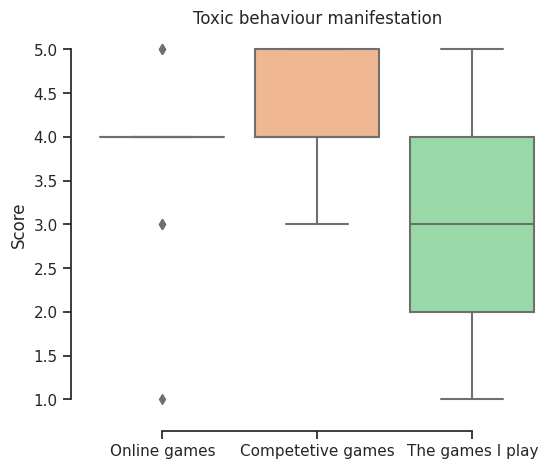

In [17]:
generate_box_plot(df, ["A207_01", "A207_02", "A207_03"], "Toxic behaviour manifestation", x_ticks=["Online games", "Competetive games", "The games I play"])

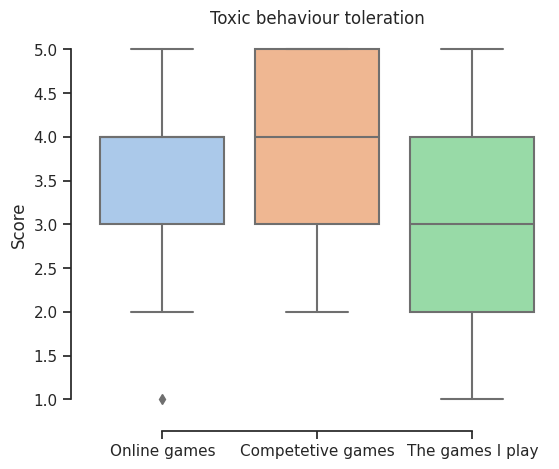

In [18]:
generate_box_plot(df, ["A203_01", "A203_02", "A203_03"], "Toxic behaviour toleration", x_ticks=["Online games", "Competetive games", "The games I play"])

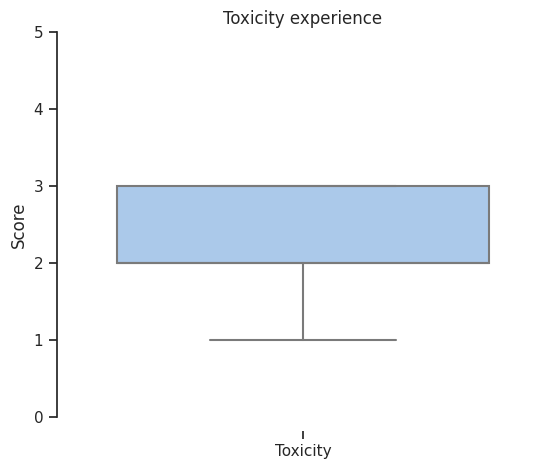

In [19]:
plt.ylim(top=5)
generate_box_plot(df, ["A201"], "Toxicity experience", x_ticks=["Toxicity"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


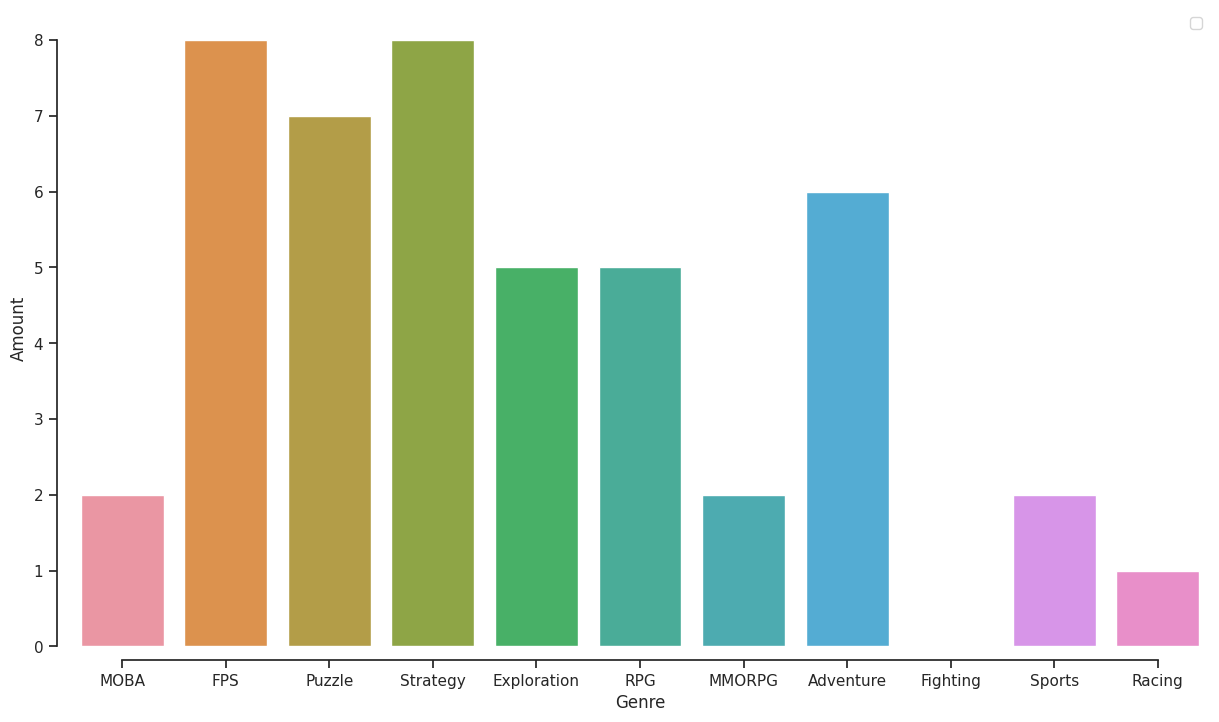

In [20]:

sns.set(rc={'figure.figsize':(14.7,8.27)})
dict = {}
def add_or_increment(dict, entry):
    if entry in dict:
        dict[entry] += 1
    else:
        dict[entry] = 1

y = []
for column_head in df[["A105_01","A105_02","A105_03","A105_04","A105_05","A105_06","A105_07","A105_08","A105_09","A105_10", "A105_11"]]:
    column = df[column_head]
    y.append((np.array(column) == 2).sum())

sns.set_theme(style="ticks", palette="pastel")
sns.barplot(x=["MOBA","FPS","Puzzle","Strategy","Exploration","RPG","MMORPG","Adventure","Fighting","Sports","Racing"], y=y)
sns.despine(offset=10, trim=True)

plt.legend()
plt.xlabel('Genre')
plt.ylabel('Amount')

sns.set(rc={'figure.figsize':(6,5)})

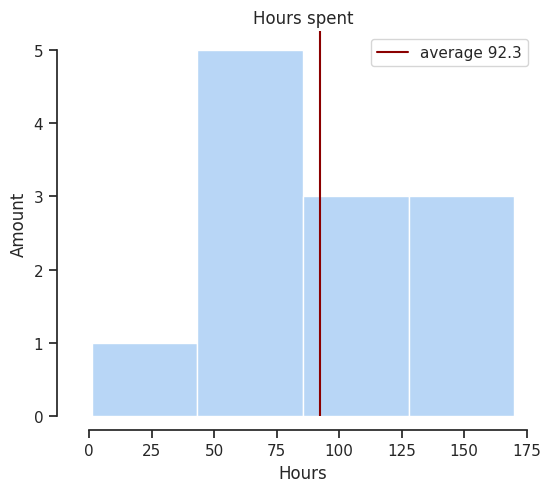

In [21]:

generate_hist_plot(df, "A103_01", 4, "Hours spent")

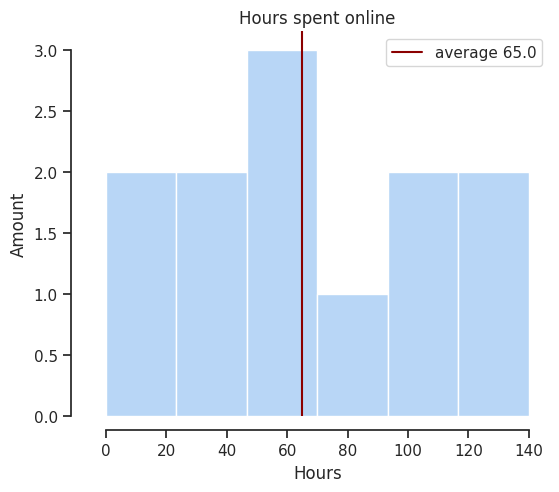

In [22]:
generate_hist_plot(df, "A104_01", 6, "Hours spent online")

Text(0, 0.5, 'Amount')

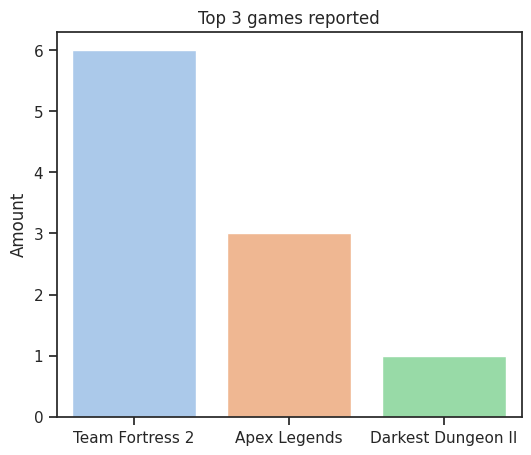

In [23]:
#A106x01
dict = {}
def add_or_increment(dict, entry):
    if entry in dict:
        dict[entry] += 1
    else:
        dict[entry] = 1

for row in df[["A106x01","A106x02","A106x03","A106x04","A106x05","A106x06"]].values:
    for val in row:
        if not pd.pandas.isna(val):
            add_or_increment(dict, val)
keys = list(dict.keys())[:3]
# get values in the same order as keys, and parse percentage values
vals = [dict[k] for k in keys][:3]
sns.barplot(x=keys, y=vals)
plt.title("Top 3 games reported")
plt.ylabel("Amount")